<a href="https://colab.research.google.com/github/marcos626/control_systems_Ogata/blob/master/01_RLC_tf_and_ss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduce RLC circuit models

#### author: Juan M. Acevedo-Valle
#### date: Dec/2018

In [ ]:
# %matplotlib inline
import control
from control import ss, tf
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### System parameters

In [ ]:
R = 1 #Ohms
C = 0.5 #Farads
L = 1 #Henries

### Transfer function from voltage source to current I(S)/V(S)

In [ ]:
num = [1,0]
den = [L,R,1/C]
tf_lcr = tf(num,den)
print(tf_lcr)


     s
-----------
s^2 + s + 2



### Step response to step with tf

In [49]:
T = np.linspace(0,20,1000)
T, y_step = control.step_response(tf_lcr,T)

### Plotear con matplotlib

Text(0, 0.5, 'Current [A]')

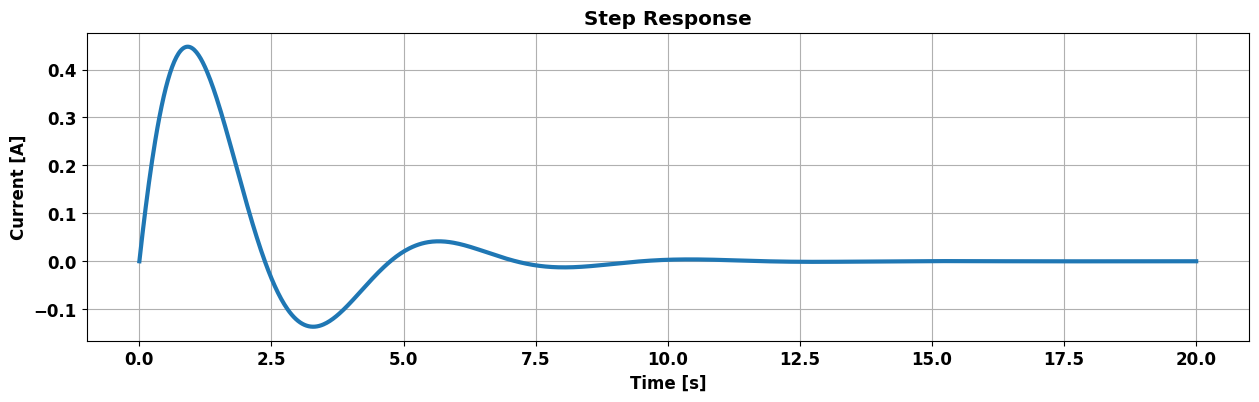

In [58]:
matplotlib.rcParams['figure.figsize'] = (15.0,4.0) #ancho x alto
plt.rcParams.update({'font.size': 12})
plt.plot(T,y_step,lw = 3)
plt.grid()
plt.title("Step Response", weight = 'bold')
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Current [A]", weight = 'bold')

### Plotear con plotly

In [54]:
# Crea la figura con plotly
fig = go.Figure(data=[go.Scatter(x=T, y=y_step, mode='lines', line=dict(width=3))])

# Agrega títulos a los ejes
fig.update_layout(
    title="Step Response",
    xaxis_title="Time [s]",
    yaxis_title="Current [A]",
    xaxis=dict(showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(showline=True, linewidth=2, linecolor='black')
)

# Muestra la figura
fig.show()

### State space (x1 = v_c, x2 = dv_c/dt)

In [ ]:
A = np.array([[0,1],[-1/(L*C),-R/L]])
B = np.array([[0], [1/(L*C)]])
Cy = np.array([[1,0],[0,C]])
Dy = np.array([[0],[0]])
ss_lcr = ss(A,B,Cy,Dy)
print(ss_lcr)

A = [[ 0.  1.]
 [-2. -1.]]

B = [[0.]
 [2.]]

C = [[1.  0. ]
 [0.  0.5]]

D = [[0]
 [0]]



### Time response to step with ss

In [61]:
T, y_step_ss = control.step_response(ss_lcr,T)

### Plotear con matplotlib

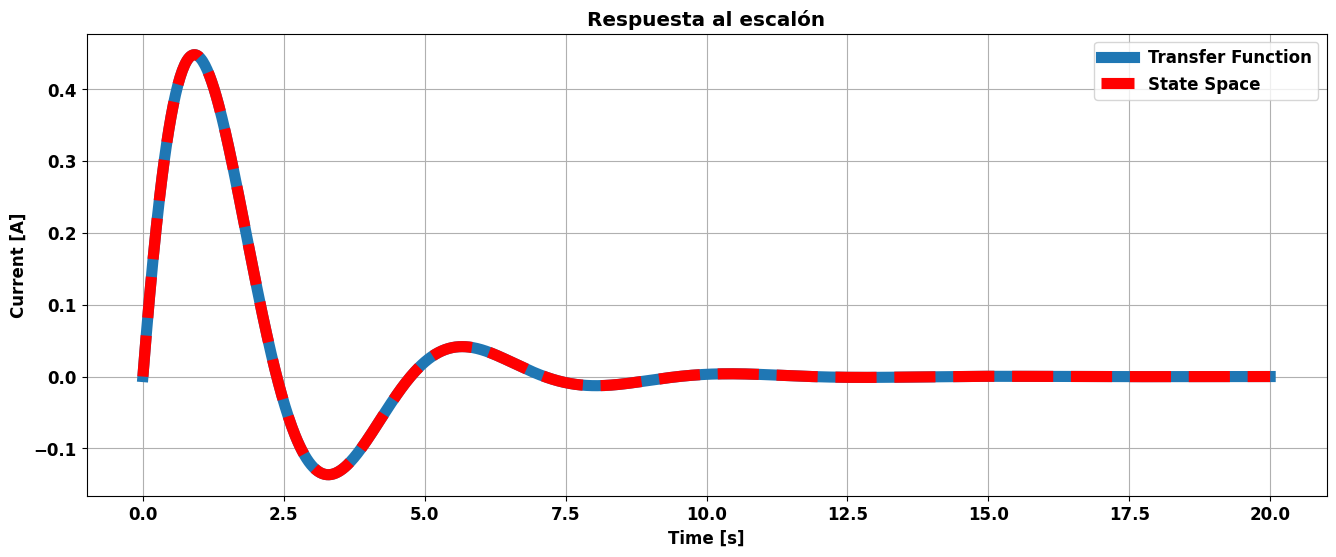

In [65]:
matplotlib.rcParams['figure.figsize'] = (16.0,6.0)
plt.rcParams.update({'font.size': 12})
plt.plot(T,y_step,lw = 8)
plt.grid()
plt.title("Respuesta al escalón", weight = 'bold')
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Current [A]", weight = 'bold')
plt.plot(T,y_step_ss[1][0], lw=8, color='r',linestyle='--')
plt.legend(['Transfer Function','State Space'])

### Plotear con Plotly

In [63]:
fig = go.Figure(data=[go.Scatter(x=T, y=y_step, mode='lines', line=dict(width=3))])

# Agrega títulos a los ejes
fig.update_layout(
    title="Step Response",
    xaxis_title="Time [s]",
    yaxis_title="Current [A]",
    xaxis=dict(showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(showline=True, linewidth=2, linecolor='black')
)

# Muestra la figura
fig.show()